# Analyse Twitter Handles

This project aims to do some exploratory data analysis on any Twitter handle. 
Tweepy API is used in this project. 

## Part 1 : Setting up Twitter API

In [50]:
#imports
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os 
import sys
import json
import jsonpickle
warnings.filterwarnings(action='ignore')

Obtain the API keys from https://apps.twitter.com/

In [41]:
#Store the API keys in a credentials.py file
#import the keys 
os.chdir('/home/anamika/Documents/work/projects/analyseTweets/')
from credentials import *

In [42]:
#setup twitter api
#for documentation go to https://apps.twitter.com/

def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with the access keys provided in credentials.py
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth, wait_on_rate_limit=True,
                    wait_on_rate_limit_notify=True)
    return api

In [43]:
#create an extractor object to extract the tweets
extractor = twitter_setup()
if(not extractor):
    print("Can't Authenticate")
    sys.exit(-1)

## Part 2: Exploring Tweepy built-in functions:

In [44]:
#insert the twitter handle you wish to analyse
user = extractor.get_user('kanyewest')
print(dir(user))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'contributors_enabled', 'created_at', 'default_profile', 'default_profile_image', 'description', 'entities', 'favourites_count', 'follow', 'follow_request_sent', 'followers', 'followers_count', 'followers_ids', 'following', 'friends', 'friends_count', 'geo_enabled', 'has_extended_profile', 'id', 'id_str', 'is_translation_enabled', 'is_translator', 'lang', 'listed_count', 'lists', 'lists_memberships', 'lists_subscriptions', 'location', 'name', 'notifications', 'parse', 'parse_list', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_b

As we can see above, dir(user) returns the list of attributes. This list can give you an idea about which attributes are relevant to performing some analysis. You can get the count of total number of tweets by a handle using the following method:

In [46]:
extractor.get_user('kanyewest').statuses_count

407

So, Kanye West has tweeted only 407 times until now. That's interesting! We can explore more of the built-in methods. For documentation, go to http://docs.tweepy.org/en/v3.5.0/api.html

## Part 3: Get Tweets

In the following part, getTweets() method tries to get tweets of a particular handle. My code manages to receive the recent 400 tweets.

In [47]:
#method to get all tweets for a particular handle
#right now it manages to get the 400 recent tweets 
def getTweets(screen_name):
    
    #initialize a list to hold all the tweepy Tweets
    allTweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    newTweets = extractor.user_timeline(screen_name = screen_name,count=200)
            
    #save most recent tweets
    allTweets.extend(newTweets)
    
    #save the id of the oldest tweet minus one
    oldest = allTweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(newTweets) > 0:        
        #all subsequent requests use the max_id param to prevent duplicates
        newTweets = extractor.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        allTweets.extend(newTweets)
        
        #update the id of the oldest tweet less one
        oldest = allTweets[-1].id - 1
        print("...%s tweets downloaded so far" % (len(allTweets)))
        
        #store the required attributes in a pandas dataframe and return the dataframe
        
        data = pd.DataFrame(data=[tweet.text for tweet in allTweets], columns=['Tweets'])
        data['len']  = np.array([len(tweet.text) for tweet in allTweets])
        data['ID']   = np.array([tweet.id for tweet in allTweets])
        data['Date'] = np.array([tweet.created_at for tweet in allTweets])
        data['Source'] = np.array([tweet.source for tweet in allTweets])
        data['Likes']  = np.array([tweet.favorite_count for tweet in allTweets])
        data['RTs']    = np.array([tweet.retweet_count for tweet in allTweets])
        data['Location'] = np.array([tweet.geo for tweet in allTweets])
        return data

Let's try to get tweets of Barack Obama

In [49]:
getTweets=get_all_tweets('BarackObama')

getting tweets before 783033210745655295
...400 tweets downloaded so far


In [51]:
#using head() method lets you peek into the initial part of your dataframe
getTweets.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,Location
0,"This National Gun Violence Awareness Day, show...",140,1002573982212788224,2018-06-01 15:33:58,Twitter for iPhone,196269,47358,None
1,We can never truly repay the debt we owe our f...,140,1001131488103030784,2018-05-28 16:02:01,Twitter for iPhone,585405,115754,None
2,This Center is for the leaders of tomorrow who...,140,999389510550028289,2018-05-23 20:40:01,Twitter for iPhone,129134,19811,None
3,"Happy Mother’s Day to every mom out there, esp...",140,995673081531248642,2018-05-13 14:32:16,Twitter for iPhone,584429,58697,None
4,There are few issues more important to the sec...,140,993938824752451586,2018-05-08 19:40:56,Twitter Web Client,449887,134597,None
5,RT @MichelleObama: Happy #CollegeSigningDay! S...,140,991709079600091136,2018-05-02 16:00:44,Twitter for iPhone,0,7044,None
6,These talented young people will create a bett...,140,988496127996678145,2018-04-23 19:13:36,Twitter for iPhone,200329,30866,None
7,Our statement on the passing of Former First L...,87,986405191711944704,2018-04-18 00:44:58,Twitter for iPhone,325881,51193,None
8,RT @ObamaFoundation: We just announced the ina...,139,985841501321269250,2018-04-16 11:25:04,Twitter for iPhone,0,5490,None
9,RT @ObamaFoundation: This week—50 years since ...,140,981540886726217729,2018-04-04 14:35:58,Twitter for iPhone,0,14026,None


# Part 4: Exploratory Analysis:

Let's so some basic statistics on the numpy arrays. 

In [54]:
#Find the average length of tweets
mean = np.mean(getTweets['len'])
print("Average length of tweets is %d" %mean)

Average length of tweets is 123


Statistics of a numpy array can be dound using describe() method. 

In [55]:
#we try to get a measure of the Likes received on Barack Obama's tweet
getTweets['Likes'].describe()

count    4.000000e+02
mean     1.500910e+05
std      4.231923e+05
min      0.000000e+00
25%      2.813500e+03
50%      5.592500e+03
75%      1.350600e+04
max      4.573005e+06
Name: Likes, dtype: float64

The above statistics shows that on an average, Obama receives 150091 likes on his tweets, whereas his most liked tweet has received 4573005 likes. Not bad! (My most-liked tweet has 11 likes!)
[This analysis is only on his most-recent 400 tweets.]

### Find out the tweet with most likes and RTs

Let us try to find which tweet by Obama has received the most number of likes and RTs. 

In [61]:
mostLiked = np.max(getTweets['Likes'])
mostRT = np.max(getTweets['RTs'])

In [62]:
print(getTweets['Tweets'].loc[getTweets['Likes'] == mostLiked])

68    "No one is born hating another person because ...
Name: Tweets, dtype: object


In [63]:
print(getTweets['Tweets'].loc[getTweets['RTs'] == mostRT])

68    "No one is born hating another person because ...
Name: Tweets, dtype: object


It should be noted that the tweet with most number of likes may not necessarily have the most number of RTs too. However, in this case, it is the same. Let us retrieve the frame number of the tweet and print out the tweet.

In [74]:
likes = getTweets[getTweets.Likes == mostLiked].index[0]
rts = getTweets[getTweets.RTs == mostRT].index[0]

In [75]:
print("The tweet with most number of likes is: \n{}".format(getTweets['Tweets'][likes]))
print("Number of likes: {}".format(mostLiked))

The tweet with most number of likes is: 
"No one is born hating another person because of the color of his skin or his background or his religion..." https://t.co/InZ58zkoAm
Number of likes: 4573005


In [76]:
print("The tweet with most number of RTs is: \n{}".format(getTweets['Tweets'][rts]))
print("Number of RTs: {}".format(mostRT))

The tweet with most number of RTs is: 
"No one is born hating another person because of the color of his skin or his background or his religion..." https://t.co/InZ58zkoAm
Number of RTs: 1701391


Let's look at this tweet.

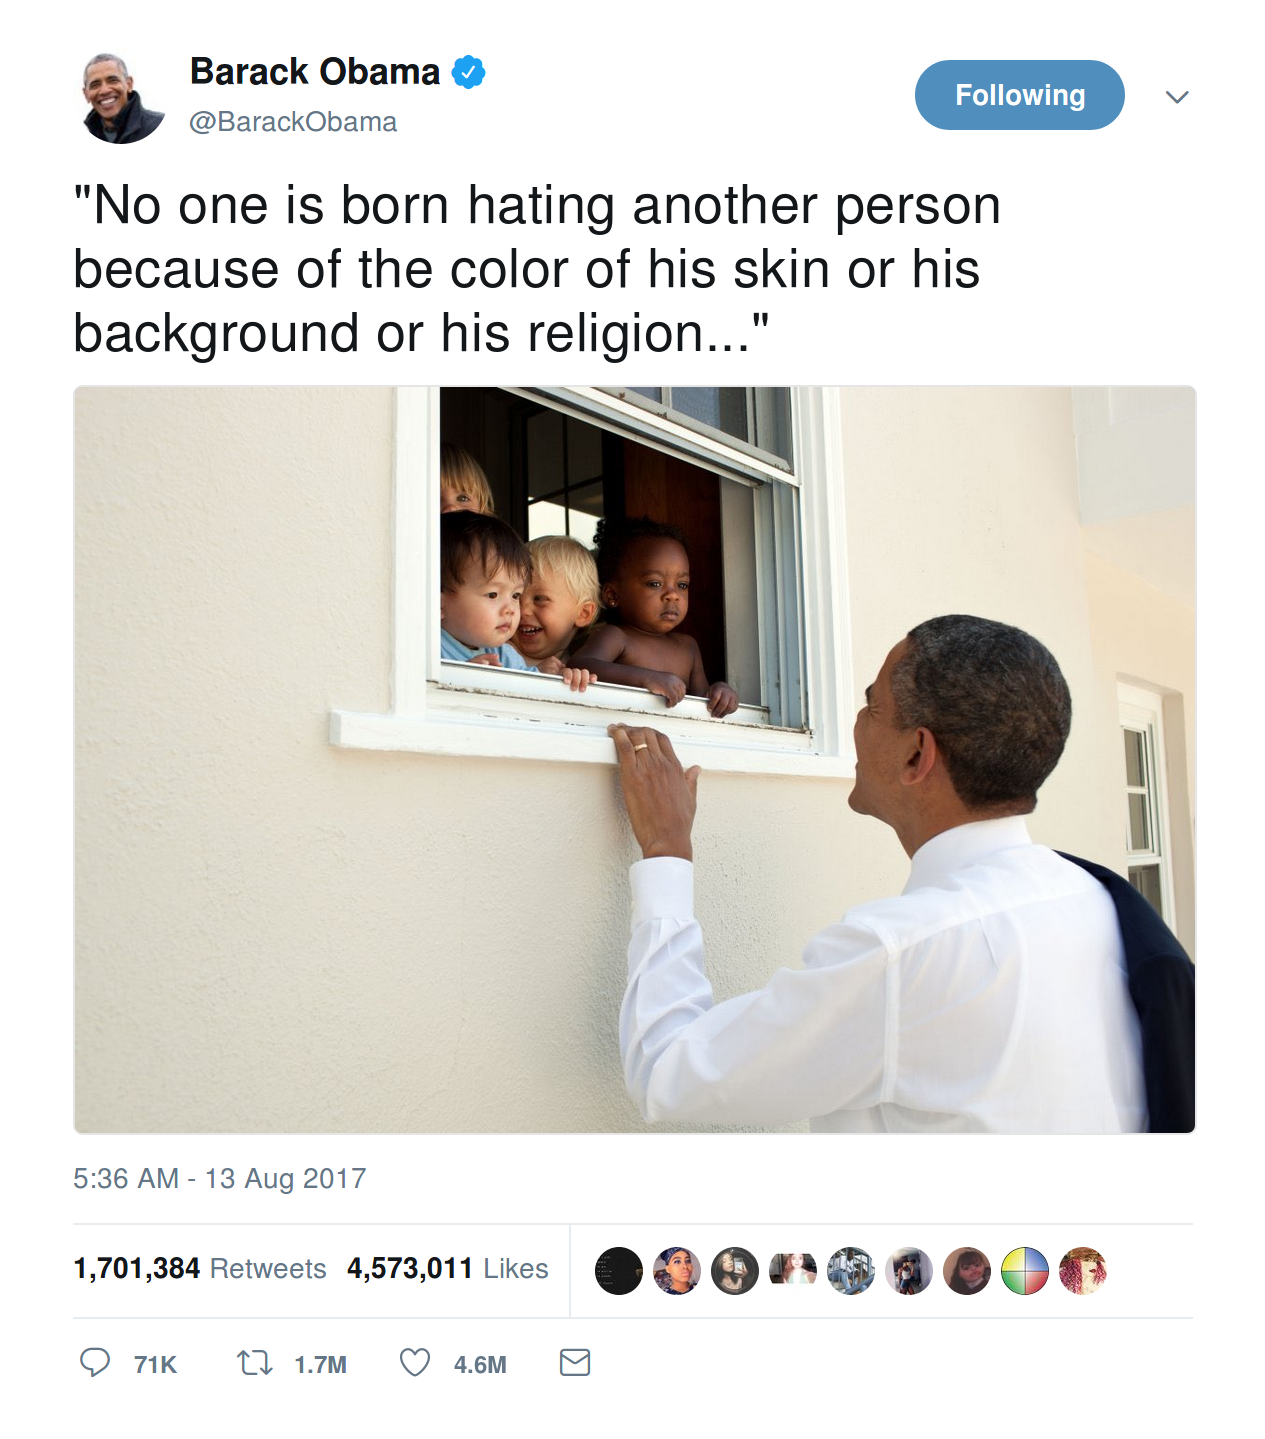

In [78]:
from IPython.display import Image
Image(filename='obamatweet.png')

In [85]:
#evaluating sources of the tweets
sources = getTweets['Source'].unique()
print(sources)

['Twitter for iPhone' 'Twitter Web Client' 'Media Studio']


As we can see there are 3 main sources of the tweets by Barack Obama. Let's evaluate their percentage.

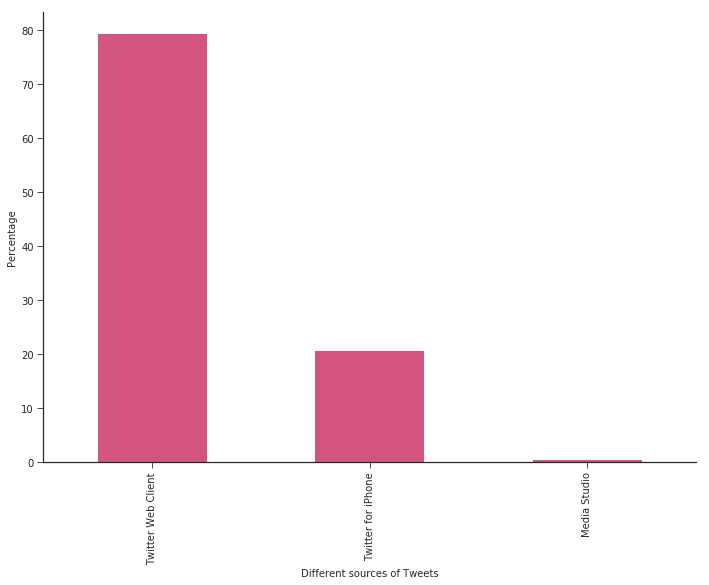

In [88]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
source_percentage = getTweets.Source.value_counts()/ getTweets.shape[0] * 100
source_percentage.plot(kind='bar',color='#D35480')
plt.xlabel('Different sources of Tweets')
plt.ylabel('Percentage')
sns.despine()

As seen above, Media Studio (https://business.twitter.com/en/help/troubleshooting/media-studio-faqs.html) did not schedule most of his recent 400 tweets. Media Studio is used to manage videos on Twitter.

In [91]:
#Let's see which tweets are scheduled by Media Studio
getTweets.loc[getTweets['Source'] == 'Media Studio']

,Tweets,len,ID,Date,Source,Likes,RTs,Location
18,"Four years ago, @MichelleObama and I had the p...",140,973260504411058176,2018-03-12 18:12:41,Media Studio,174454,19687,None


In [92]:
print("The tweet managed by Media Studio is: \n{}".format(getTweets['Tweets'][18]))

The tweet managed by Media Studio is: 
Four years ago, @MichelleObama and I had the privilege to host Lt. Cmdr. Dan Cnossen and his fellow Paralympians an… https://t.co/kneWyU2Tu1


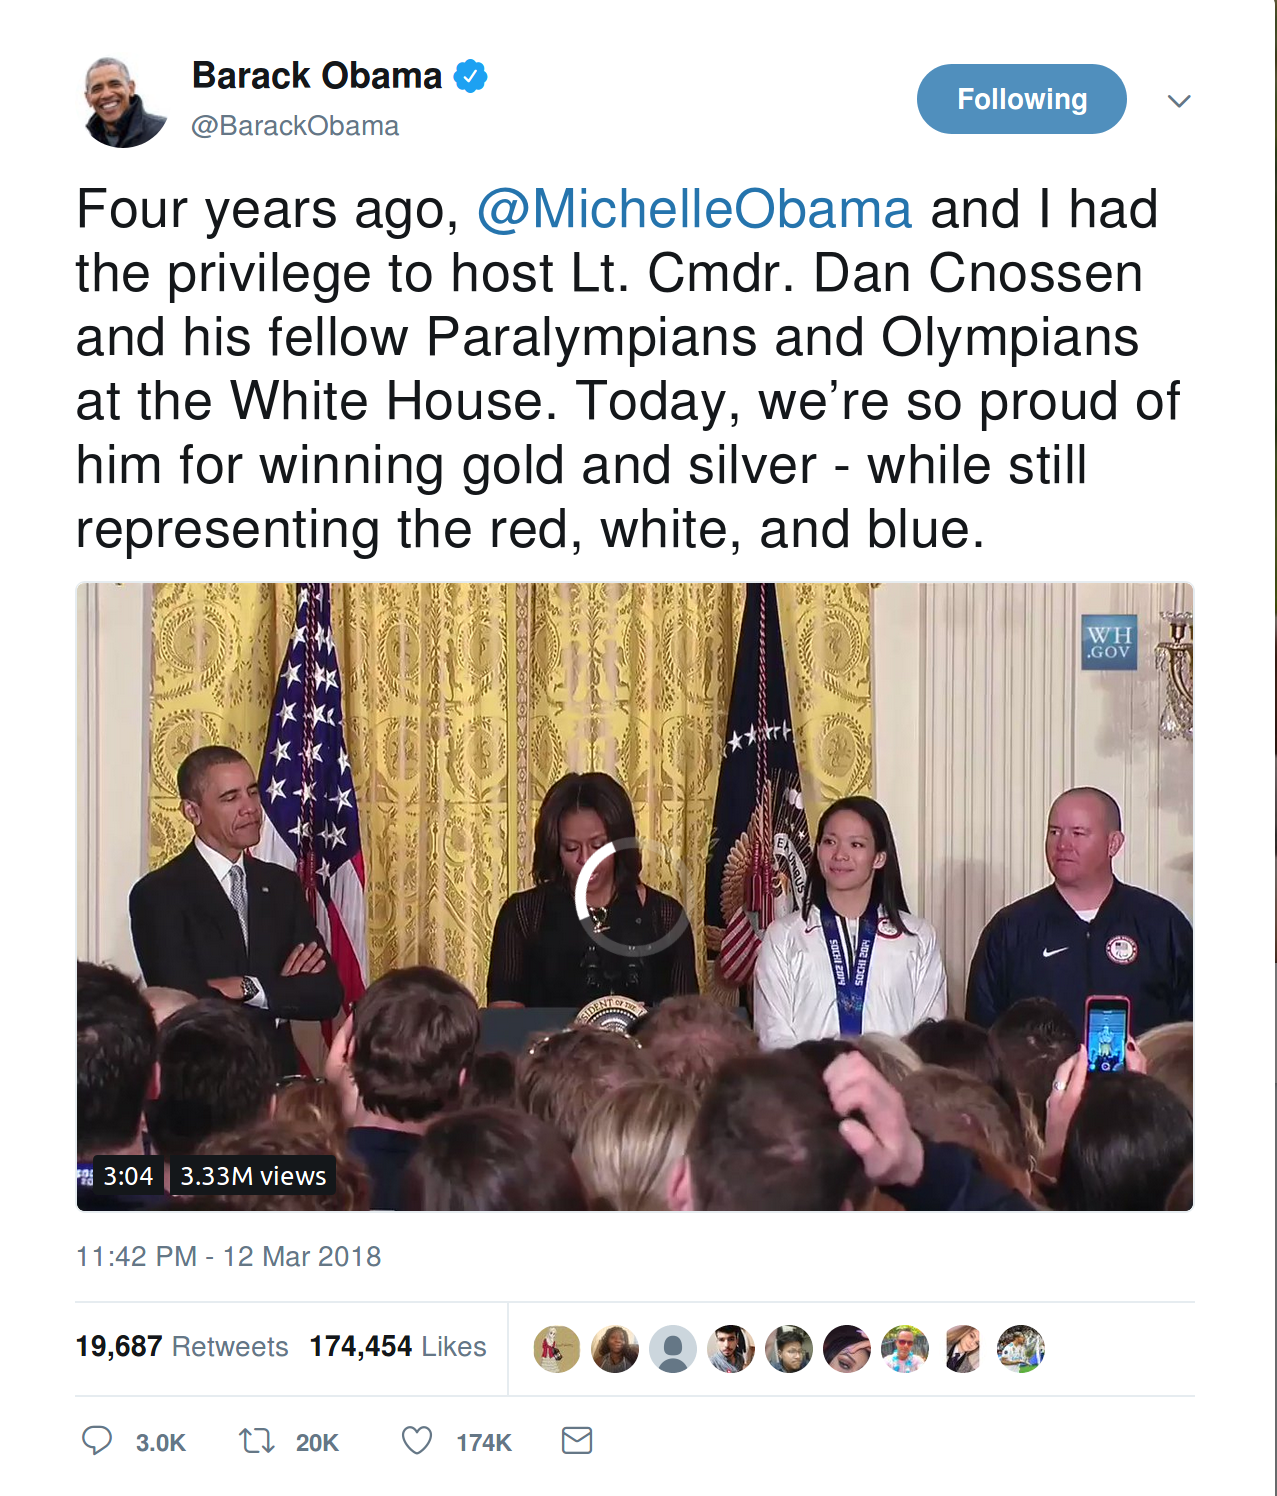

In [93]:
Image(filename='mediastudio.png')

Only one tweet was scheduled by the Media Studio shown above.

# Part 5: Time Series

This lets us evaluate the trend of his tweets over the course of time

In [80]:
tlen = pd.Series(data=getTweets['len'].values, index=getTweets['Date'])
tlike = pd.Series(data=getTweets['Likes'].values, index=getTweets['Date'])
trt = pd.Series(data=getTweets['RTs'].values, index=getTweets['Date'])

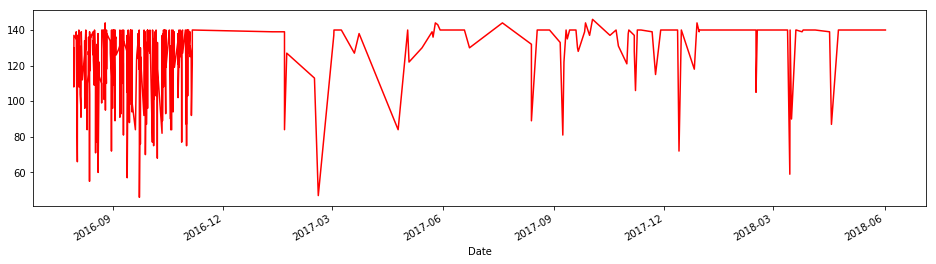

In [81]:
# Lengths along time:
tlen.plot(figsize=(16,4), color='r');


Barack Obama served as the President of the United States from January 20, 2009, to January 20, 2017. From the Time Series graph above, we can see that the amount of tweets were dense from September 2016 to December 2016 towards the end of his tenure. He does not tweet much these days. His tweets dropped around March of 2017. Maybe that's just a bit of relaxation he needed! ;)

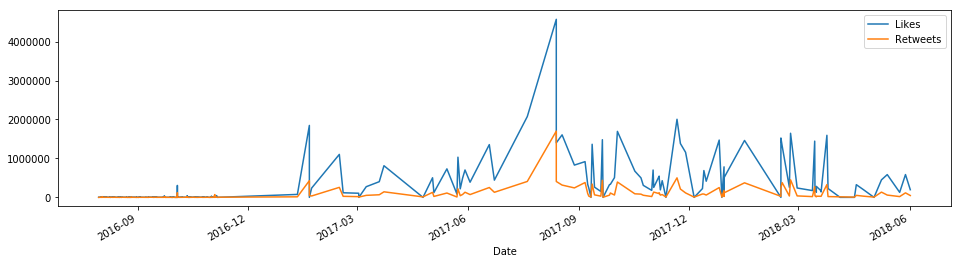

In [82]:
# Likes vs retweets visualization:
tlike.plot(figsize=(16,4), label="Likes", legend=True)
trt.plot(figsize=(16,4), label="Retweets", legend=True);

From the graph of Likes vs RTs above, it is evident that he likes more than he retweets. Maybe his RTs are endorsements?

# Part 6: Sentimental Analysis

Let us do a sentimental analysis on the tweets by Barack Obama. textblob library is used for the NLP.

In [95]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [96]:
getTweets['analysis'] = np.array([analyze_sentiment(tweet) for tweet in getTweets['Tweets'] ])

In [97]:
getTweets

,Tweets,len,ID,Date,Source,Likes,RTs,Location,analysis
0,"This National Gun Violence Awareness Day, show...",140,1002573982212788224,2018-06-01 15:33:58,Twitter for iPhone,196269,47358,None,1
1,We can never truly repay the debt we owe our f...,140,1001131488103030784,2018-05-28 16:02:01,Twitter for iPhone,585405,115754,None,0
2,This Center is for the leaders of tomorrow who...,140,999389510550028289,2018-05-23 20:40:01,Twitter for iPhone,129134,19811,None,1
3,"Happy Mother’s Day to every mom out there, esp...",140,995673081531248642,2018-05-13 14:32:16,Twitter for iPhone,584429,58697,None,1
4,There are few issues more important to the sec...,140,993938824752451586,2018-05-08 19:40:56,Twitter Web Client,449887,134597,None,1
5,RT @MichelleObama: Happy #CollegeSigningDay! S...,140,991709079600091136,2018-05-02 16:00:44,Twitter for iPhone,0,7044,None,1
6,These talented young people will create a bett...,140,988496127996678145,2018-04-23 19:13:36,Twitter for iPhone,200329,30866,None,1
7,Our statement on the passing of Former First L...,87,986405191711944704,2018-04-18 00:44:58,Twitter for iPhone,325881,51193,None,1
8,RT @ObamaFoundation: We just announced the ina...,139,985841501321269250,2018-04-16 11:25:04,Twitter for iPhone,0,5490,None,1
9,RT @ObamaFoundation: This week—50 years since ...,140,981540886726217729,2018-04-04 14:35:58,Twitter for iPhone,0,14026,None,-1


Let us visualise the sentimental analysis of Obama's tweets.

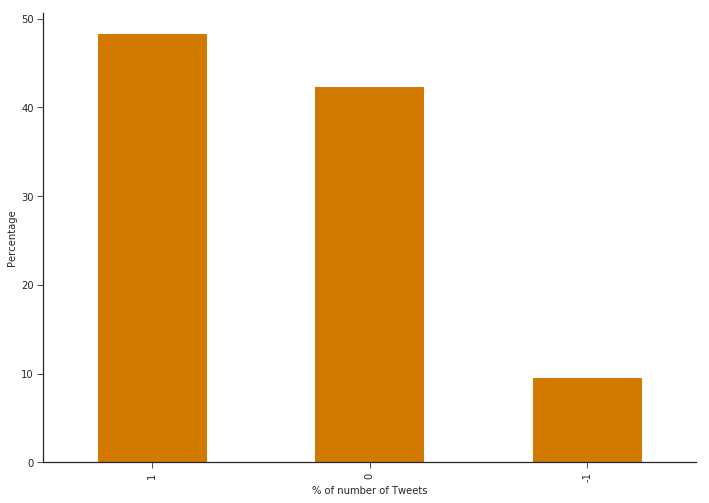

In [101]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sentiment_percentage = getTweets.analysis.value_counts()/ getTweets.shape[0] * 100
sentiment_percentage.plot(kind='bar',color='#D27900')
plt.xlabel('% of number of Tweets')
plt.ylabel('Percentage')
sns.despine()

Here, 1, 0 and -1 resemble positive, neutral and negative sentiments respectively.
We can see over 45% of his tweets are considered to be positive while less than 10% are negative.